# Density based Clustering

In [5]:
from sklearn.cluster import MiniBatchKMeans,AgglomerativeClustering,KMeans,DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
milk_df=pd.read_csv(r'..\Datasets\milk.csv',index_col=0)
milk_df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
scaler=StandardScaler().set_output(transform='pandas')
milk_scaled=scaler.fit_transform(milk_df)
milk_scaled.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988


In [9]:
dbscan=DBSCAN(eps=1,min_samples=2)
dbscan.fit(milk_scaled)
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1 -1 -1  1  2  2  2 -1
 -1]


In [10]:
milk_scaled['Clust']=dbscan.labels_
df_scl_inliers=milk_scaled[milk_scaled['Clust']!=1]
print(silhouette_score(df_scl_inliers.iloc[:,:-1],df_scl_inliers.iloc[:,-1]))

0.41538844965387806


In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

epi = np.linspace(0.01, 1.5, 10)
min_pts = [2, 3, 4, 5]
score = []

for e in epi:
    for mp in min_pts:
        dbscan = DBSCAN(eps=e, min_samples=mp)
        milk_scaled_copy = milk_scaled.copy()
        milk_scaled_copy['Clust'] = dbscan.fit_predict(milk_scaled_copy)
        df_scl_inliers = milk_scaled_copy[milk_scaled_copy['Clust'] != -1]
        unique_clusters = len(set(df_scl_inliers['Clust']))
        if unique_clusters > 1:
            sil_score = silhouette_score(df_scl_inliers.iloc[:, :-1], df_scl_inliers['Clust'])
        else:
            sil_score = None  
        score.append([e, mp, sil_score])

score_df = pd.DataFrame(score, columns=['Epsilon', 'Minimum Points', 'Score'])
score_df.sort_values(by='Score', ascending=False, inplace=True)
score_df.head(
    
)

,Epsilon,Minimum Points,Score
8,0.341111,2,0.903367
25,1.003333,3,0.647387
12,0.506667,2,0.593446
16,0.672222,2,0.574846
32,1.334444,2,0.552889


## using pca kmeans

In [ ]:
milk_df=pd.read_csv(r'..\Datasets\milk.csv',index_col=0)
milk_df.head()

# scaling
scaler=StandardScaler().set_output(transform='pandas')
milk_scaled=scaler.fit_transform(milk_df)
milk_scaled.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988


In [ ]:
# Kmeans
KMean = KMeans(n_clusters=2)
KMean.fit_predict(milk_scaled)
KMean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [22]:
# pca
pca=PCA(n_components=2)
pca_f=pca.fit_transform(milk_scaled)
pca_df = pd.DataFrame(pca_f, columns=['PC1', 'PC2'])
pca_df['Cluster'] = KMean.labels_
pca_df.head()

,PC1,PC2,Cluster
0,2.435175,-0.231478,0
1,2.258736,-0.693148,0
2,2.335861,-0.663328,0
3,2.318677,-0.273815,0
4,2.060294,-1.019199,0


In [24]:
pca.components_

array([[ 0.47294379, -0.46657047, -0.44868269,  0.48289116, -0.35232959],
       [ 0.35285509,  0.32094099, -0.47603724,  0.05951482,  0.73643513]])

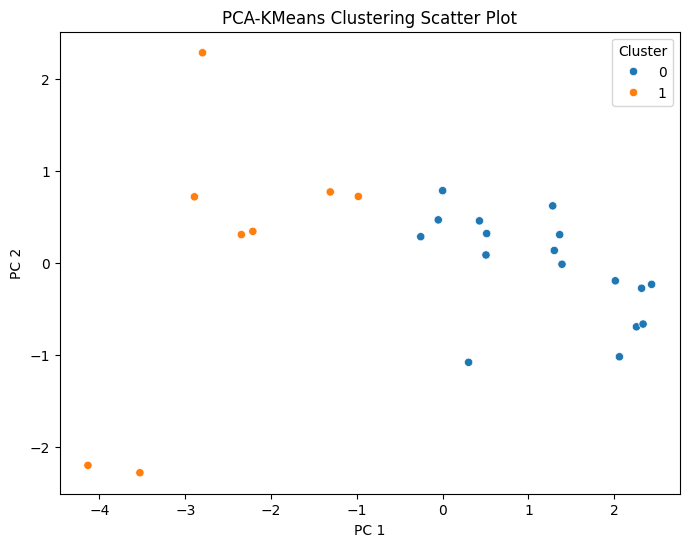

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster')

plt.title("PCA-KMeans Clustering Scatter Plot")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()

### for glass data set


In [ ]:

glass_df=pd.read_csv(r'..\Cases\Glass Identification\Glass.csv')
glass_df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [31]:
glass_fea=glass_df.drop('Type',axis=1)
glass_fea.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [33]:
clust=DBSCAN()
clust.fit_predict(glass_fea)
clust.feature_names_in_
clust.components_

array([[ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       [ 1.51766, 13.21   ,  3.69   , ...,  8.22   ,  0.     ,  0.     ],
       [ 1.51742, 13.27   ,  3.62   , ...,  8.07   ,  0.     ,  0.     ],
       ...,
       [ 1.51617, 14.95   ,  0.     , ...,  8.71   ,  0.67   ,  0.     ],
       [ 1.51732, 14.95   ,  0.     , ...,  8.61   ,  1.55   ,  0.     ],
       [ 1.51685, 14.92   ,  0.     , ...,  8.4    ,  1.59   ,  0.     ]],
      shape=(115, 9))